In [150]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
import plotly as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

Data Collection

In [151]:
df1= pd.read_csv("/content/Resale Flat Prices (Based on Approval Date), 1990 - 1999.csv")

In [152]:
df2 = pd.read_csv("/content/Resale Flat Prices (Based on Approval Date), 2000 - Feb 2012.csv")

In [153]:
df3 = pd.read_csv("/content/Resale Flat Prices (Based on Registration Date), From Mar 2012 to Dec 2014.csv")

In [154]:
df4 = pd.read_csv("/content/Resale Flat Prices (Based on Registration Date), From Jan 2015 to Dec 2016.csv")

In [155]:
df5 = pd.read_csv("/content/Resale flat prices based on registration date from Jan-2017 onwards.csv")

In [156]:
df4["remaining_lease"]= df4["remaining_lease"].astype(int)

In [157]:
df4.rename(columns={'remaining_lease': 'remaining_lease_year'})

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease_year,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0
...,...,...,...,...,...,...,...,...,...,...,...
37148,2016-12,YISHUN,5 ROOM,297,YISHUN ST 20,13 TO 15,112.0,Improved,2000,82,488000.0
37149,2016-12,YISHUN,5 ROOM,838,YISHUN ST 81,01 TO 03,122.0,Improved,1987,69,455000.0
37150,2016-12,YISHUN,EXECUTIVE,664,YISHUN AVE 4,10 TO 12,181.0,Apartment,1992,74,778000.0
37151,2016-12,YISHUN,EXECUTIVE,325,YISHUN CTRL,01 TO 03,146.0,Maisonette,1988,70,575000.0


In [158]:
slice_values= []
for i in df5["remaining_lease"].astype(str):
    j= i.replace("years","")
    k= j.replace("months","")
    l= k.replace("month","")
    m= l.strip()
    n= m.split("  ")
    slice_values.append(n)

In [159]:
df_data= pd.DataFrame(slice_values,columns=["remaining_lease_year", "remaining_lease_month"])

In [160]:
df_data["remaining_lease_year"]= df_data["remaining_lease_year"].astype(int)
df_data["remaining_lease_month"]= df_data["remaining_lease_month"].fillna(0).astype(int)

In [161]:
df5= pd.concat([df5,df_data],axis=1)

In [162]:
#droping the "remaining_lease" column
df5.drop(columns=["remaining_lease"],inplace= True)

In [163]:
df = pd.concat([df1,df2,df3,df4,df5])
df.reset_index(drop=True,inplace=True)

In [164]:
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,remaining_lease_year,remaining_lease_month
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN,NaN,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN,NaN,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN,NaN,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN,NaN,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
939945,2024-11,YISHUN,5 ROOM,235,YISHUN ST 21,07 TO 09,135.0,Model A,1985,686000.0,NaN,59.0,10.0
939946,2024-11,YISHUN,5 ROOM,335C,YISHUN ST 31,07 TO 09,112.0,Improved,2015,700000.0,NaN,90.0,1.0
939947,2024-11,YISHUN,5 ROOM,511B,YISHUN ST 51,10 TO 12,113.0,Improved,2017,720000.0,NaN,91.0,10.0
939948,2024-11,YISHUN,5 ROOM,602,YISHUN ST 61,01 TO 03,121.0,Improved,1987,620000.0,NaN,61.0,8.0


In [165]:
df.dtypes

,0
month,object
town,object
flat_type,object
block,object
street_name,object
storey_range,object
floor_area_sqm,float64
flat_model,object
lease_commence_date,int64
resale_price,float64


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 939950 entries, 0 to 939949
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   month                  939950 non-null  object 
 1   town                   939950 non-null  object 
 2   flat_type              939950 non-null  object 
 3   block                  939950 non-null  object 
 4   street_name            939950 non-null  object 
 5   storey_range           939950 non-null  object 
 6   floor_area_sqm         939950 non-null  float64
 7   flat_model             939950 non-null  object 
 8   lease_commence_date    939950 non-null  int64  
 9   resale_price           939950 non-null  float64
 10  remaining_lease        37153 non-null   float64
 11  remaining_lease_year   193747 non-null  float64
 12  remaining_lease_month  193747 non-null  float64
dtypes: float64(5), int64(1), object(7)
memory usage: 93.2+ MB


Data Preprocessing

In [167]:
df.isnull().sum()

,0
month,0
town,0
flat_type,0
block,0
street_name,0
storey_range,0
floor_area_sqm,0
flat_model,0
lease_commence_date,0
resale_price,0


In [168]:
df.drop(columns=["remaining_lease"],inplace=True)

In [169]:
#handling the missing value
df["remaining_lease_year"].fillna(0,inplace=True)
df["remaining_lease_month"].fillna(0,inplace=True)

In [170]:

df.isnull().sum()

,0
month,0
town,0
flat_type,0
block,0
street_name,0
storey_range,0
floor_area_sqm,0
flat_model,0
lease_commence_date,0
resale_price,0


In [171]:
# Create a new column "address"
df["address"]= df["block"]+" "+df["street_name"]

In [172]:
#drop the "street_name" and "block"
df_final= df.drop(columns=["block","street_name"])

In [173]:
df_final.head(2)

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease_year,remaining_lease_month,address
0,1990-01,ANG MO KIO,1 ROOM,10 TO 12,31.0,IMPROVED,1977,9000.0,0.0,0.0,309 ANG MO KIO AVE 1
1,1990-01,ANG MO KIO,1 ROOM,04 TO 06,31.0,IMPROVED,1977,6000.0,0.0,0.0,309 ANG MO KIO AVE 1


In [174]:
# for month
df_final["month"] = pd.to_datetime(df_final["month"], format="%Y-%m")

In [175]:
#split the month column to "Year", "month".
df_final["year"]= df_final["month"].dt.year
df_final["month"]= df_final["month"].dt.month

In [176]:
df_final.head(2)

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease_year,remaining_lease_month,address,year
0,1,ANG MO KIO,1 ROOM,10 TO 12,31.0,IMPROVED,1977,9000.0,0.0,0.0,309 ANG MO KIO AVE 1,1990
1,1,ANG MO KIO,1 ROOM,04 TO 06,31.0,IMPROVED,1977,6000.0,0.0,0.0,309 ANG MO KIO AVE 1,1990


In [177]:
df_final.dtypes

,0
month,int32
town,object
flat_type,object
storey_range,object
floor_area_sqm,float64
flat_model,object
lease_commence_date,int64
resale_price,float64
remaining_lease_year,float64
remaining_lease_month,float64


In [178]:
# cheking the number of unique characters in categorical column for encoding
df_final["town"].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG', 'CLEMENTI',
       'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'QUEENSTOWN', 'SENGKANG',
       'SERANGOON', 'TAMPINES', 'TOA PAYOH', 'WOODLANDS', 'YISHUN',
       'LIM CHU KANG', 'SEMBAWANG', 'BUKIT PANJANG', 'PASIR RIS',
       'PUNGGOL'], dtype=object)

In [179]:
df_final["town"].nunique()

27

In [180]:
df_final["flat_type"].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION', 'MULTI-GENERATION'], dtype=object)

In [181]:
df_final["flat_type"].nunique()

8

In [182]:
df_final["flat_model"].unique()

array(['IMPROVED', 'NEW GENERATION', 'MODEL A', 'STANDARD', 'SIMPLIFIED',
       'MODEL A-MAISONETTE', 'APARTMENT', 'MAISONETTE', 'TERRACE',
       '2-ROOM', 'IMPROVED-MAISONETTE', 'MULTI GENERATION',
       'PREMIUM APARTMENT', 'Improved', 'New Generation', 'Model A',
       'Standard', 'Apartment', 'Simplified', 'Model A-Maisonette',
       'Maisonette', 'Multi Generation', 'Adjoined flat',
       'Premium Apartment', 'Terrace', 'Improved-Maisonette',
       'Premium Maisonette', '2-room', 'Model A2', 'DBSS', 'Type S1',
       'Type S2', 'Premium Apartment Loft', '3Gen'], dtype=object)

In [183]:
df_final["flat_model"].nunique()

34

Encoding the categorical column

In [184]:
# choosing the "LabelEncoder" for "town",and "OrdinalEncoder" for the "flat_model" and the "flat_type"
df_final["town"]= LabelEncoder().fit_transform(df_final["town"])
df_final["flat_model"]= OrdinalEncoder().fit_transform(df_final[["flat_model"]])
df_final["flat_type"]= OrdinalEncoder().fit_transform(df_final[["flat_type"]])

In [185]:
df_final[["storey_start", "storey_end"]]= df_final["storey_range"].str.split(" TO ",expand=True)

In [186]:
#drop the "storey_range" column
df_final.drop(columns=["storey_range"],inplace= True)

In [187]:
df_final["address"].nunique()

9865

In [188]:
df_final["address"] = LabelEncoder().fit_transform(df_final["address"])

In [189]:
df_final

,month,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease_year,remaining_lease_month,address,year,storey_start,storey_end
0,1,0,0.0,31.0,7.0,1977,9000.0,0.0,0.0,3847,1990,10,12
1,1,0,0.0,31.0,7.0,1977,6000.0,0.0,0.0,3847,1990,04,06
2,1,0,0.0,31.0,7.0,1977,8000.0,0.0,0.0,3847,1990,10,12
3,1,0,0.0,31.0,7.0,1977,6000.0,0.0,0.0,3847,1990,07,09
4,1,0,2.0,73.0,20.0,1976,47200.0,0.0,0.0,2385,1990,04,06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
939945,11,26,4.0,135.0,16.0,1985,686000.0,59.0,10.0,2771,2024,07,09
939946,11,26,4.0,112.0,9.0,2015,700000.0,90.0,1.0,4342,2024,07,09
939947,11,26,4.0,113.0,9.0,2017,720000.0,91.0,10.0,6429,2024,10,12
939948,11,26,4.0,121.0,9.0,1987,620000.0,61.0,8.0,7221,2024,01,03


In [190]:
df_final["storey_start"] = df_final["storey_start"].astype(int)
df_final["storey_end"] = df_final["storey_end"].astype(int)

In [191]:
# set the columns
df_final= df_final[['year','month', 'town', 'flat_type', 'floor_area_sqm', 'flat_model', 'address',
       'storey_start', 'storey_end', 'remaining_lease_year','remaining_lease_month',
       'lease_commence_date', 'resale_price']]

In [192]:
df_final.sort_values(by=["year","month"])

,year,month,town,flat_type,floor_area_sqm,flat_model,address,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
0,1990,1,0,0.0,31.0,7.0,3847,10,12,0.0,0.0,1977,9000.0
1,1990,1,0,0.0,31.0,7.0,3847,4,6,0.0,0.0,1977,6000.0
2,1990,1,0,0.0,31.0,7.0,3847,10,12,0.0,0.0,1977,8000.0
3,1990,1,0,0.0,31.0,7.0,3847,7,9,0.0,0.0,1977,6000.0
4,1990,1,0,2.0,73.0,20.0,2385,4,6,0.0,0.0,1976,47200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
939945,2024,11,26,4.0,135.0,16.0,2771,7,9,59.0,10.0,1985,686000.0
939946,2024,11,26,4.0,112.0,9.0,4342,7,9,90.0,1.0,2015,700000.0
939947,2024,11,26,4.0,113.0,9.0,6429,10,12,91.0,10.0,2017,720000.0
939948,2024,11,26,4.0,121.0,9.0,7221,1,3,61.0,8.0,1987,620000.0


In [193]:
df_final.to_csv("ResaleFlatPrices.csv", index= False)

In [194]:
df_final.describe().T

,count,mean,std,min,25%,50%,75%,max
year,939950.0,2006.411165,9.484776,1990.0,1999.0,2005.0,2014.0,2024.0
month,939950.0,6.572338,3.399733,1.0,4.0,7.0,10.0,12.0
town,939950.0,13.662941,8.790282,0.0,5.0,13.0,23.0,26.0
flat_type,939950.0,3.014768,0.949113,0.0,2.0,3.0,4.0,7.0
floor_area_sqm,939950.0,95.685611,25.804280,28.0,73.0,93.0,113.0,366.7
flat_model,939950.0,15.716906,6.659245,0.0,9.0,16.0,21.0,33.0
address,939950.0,4811.421122,2867.835243,0.0,2304.0,4764.0,7284.0,9864.0
storey_start,939950.0,6.696505,4.840463,1.0,4.0,7.0,10.0,49.0
storey_end,939950.0,8.711055,4.840415,3.0,6.0,9.0,12.0,51.0
remaining_lease_year,939950.0,15.262197,30.623294,0.0,0.0,0.0,0.0,97.0


EDA

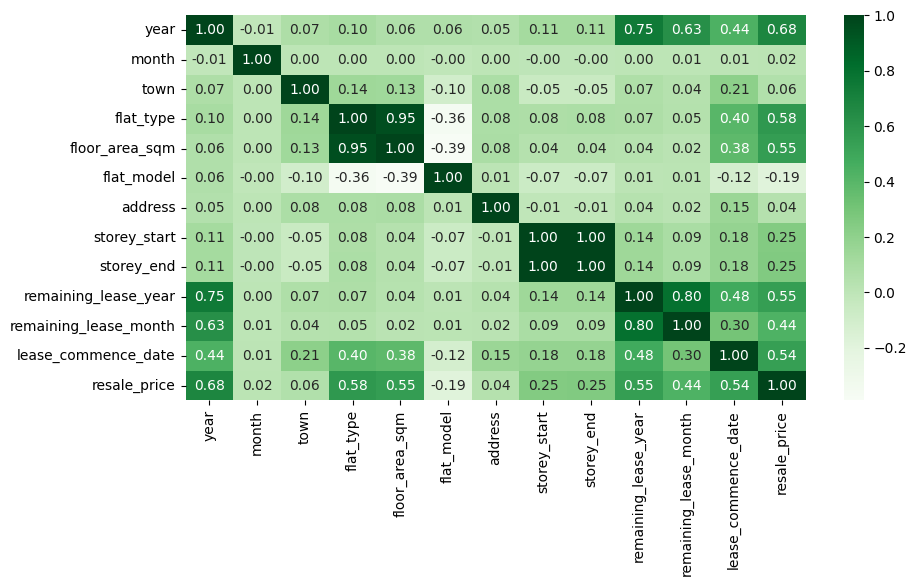

In [195]:
# Checking the Correlation using heatmap

final_data_corr= df_final.corr()
plt.figure(figsize=(10,5))
sns.heatmap(final_data_corr,annot= True, cmap="Greens", fmt=".2f")
plt.show()

In [196]:
# The month,address column does have very lowest correlation with other features
# So, going to drop the month and address columns
df_final.drop(columns=["month","address"],inplace= True)

In [197]:
df_final

,year,town,flat_type,floor_area_sqm,flat_model,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
0,1990,0,0.0,31.0,7.0,10,12,0.0,0.0,1977,9000.0
1,1990,0,0.0,31.0,7.0,4,6,0.0,0.0,1977,6000.0
2,1990,0,0.0,31.0,7.0,10,12,0.0,0.0,1977,8000.0
3,1990,0,0.0,31.0,7.0,7,9,0.0,0.0,1977,6000.0
4,1990,0,2.0,73.0,20.0,4,6,0.0,0.0,1976,47200.0
...,...,...,...,...,...,...,...,...,...,...,...
939945,2024,26,4.0,135.0,16.0,7,9,59.0,10.0,1985,686000.0
939946,2024,26,4.0,112.0,9.0,7,9,90.0,1.0,2015,700000.0
939947,2024,26,4.0,113.0,9.0,10,12,91.0,10.0,2017,720000.0
939948,2024,26,4.0,121.0,9.0,1,3,61.0,8.0,1987,620000.0


In [198]:
# checking the duplicate values
df_final.duplicated().sum()

66271

In [199]:
# drop duplicate values
df_final= df_final.drop_duplicates()
df_final.reset_index(drop= True, inplace= True)

In [200]:
df_final.duplicated().sum()

0

In [201]:
df_final.isnull().sum()

,0
year,0
town,0
flat_type,0
floor_area_sqm,0
flat_model,0
storey_start,0
storey_end,0
remaining_lease_year,0
remaining_lease_month,0
lease_commence_date,0


Detecting the skewed and outlier columns using plot

In [202]:

def plot(data,column):
  #distplot
  plt.figure(figsize=(15,4))
  plt.subplot(1,3,1)
  sns.distplot(data[column])
  plt.title("distplot for"+" "+column)

  #boxplot

  plt.subplot(1,3,3)

  sns.boxplot(data, x=column)
  plt.title("Box plot for"+" "+column)

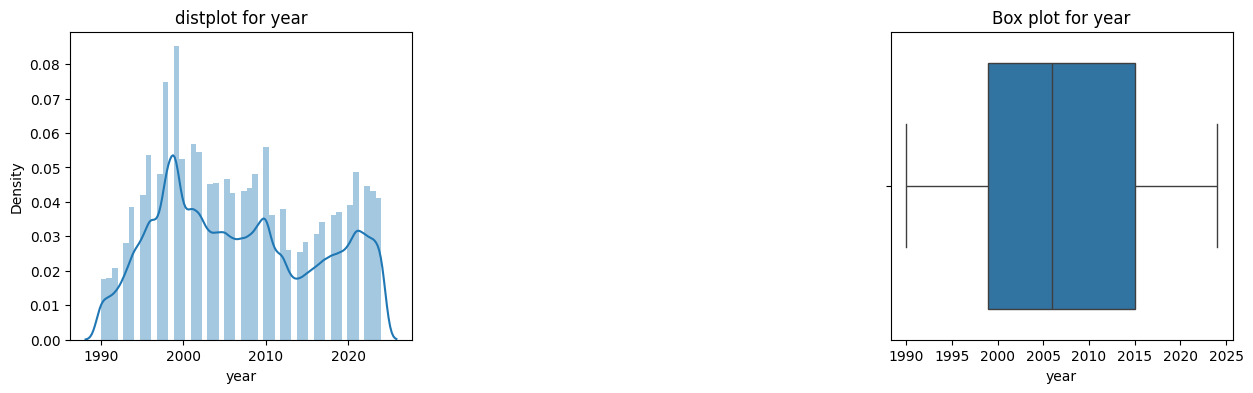

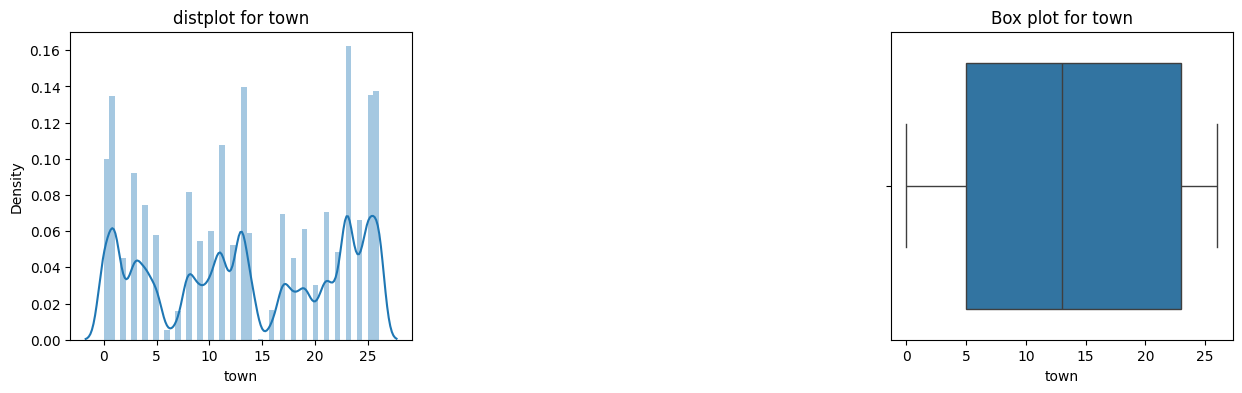

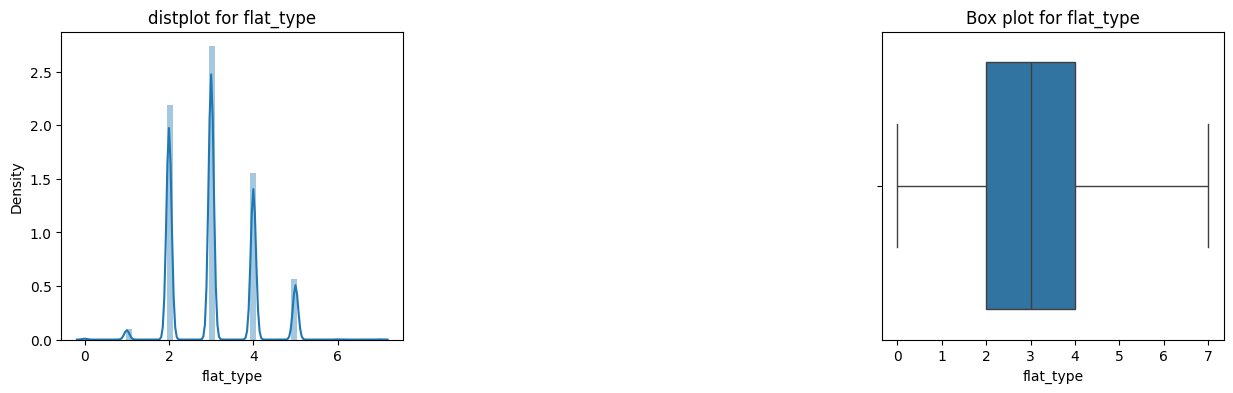

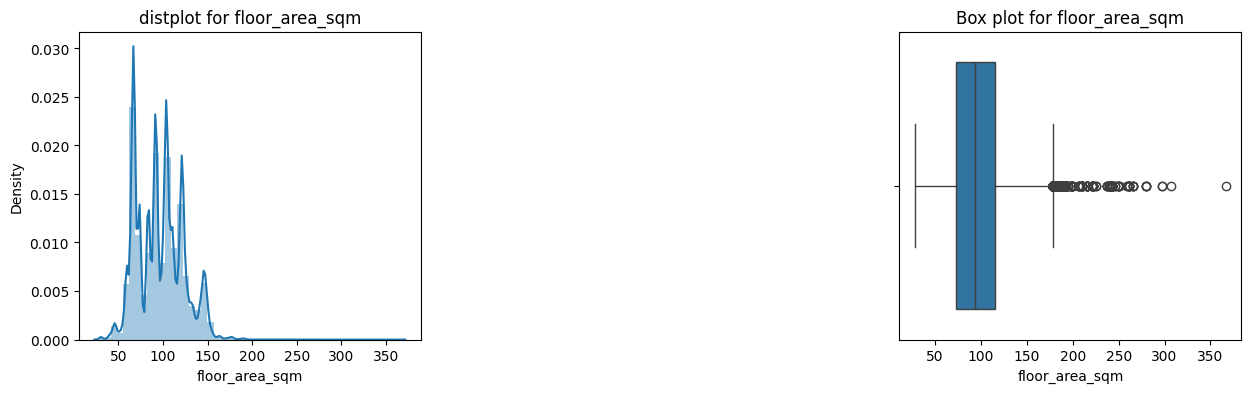

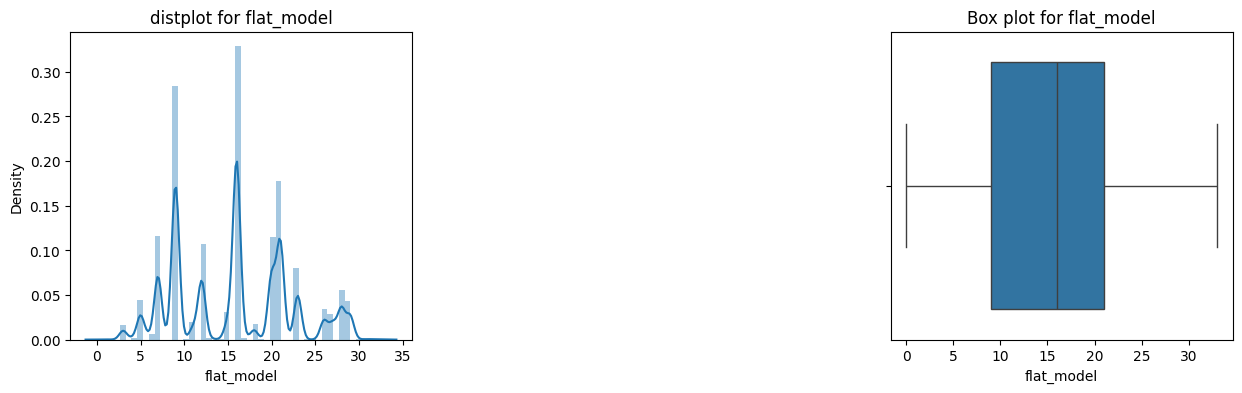

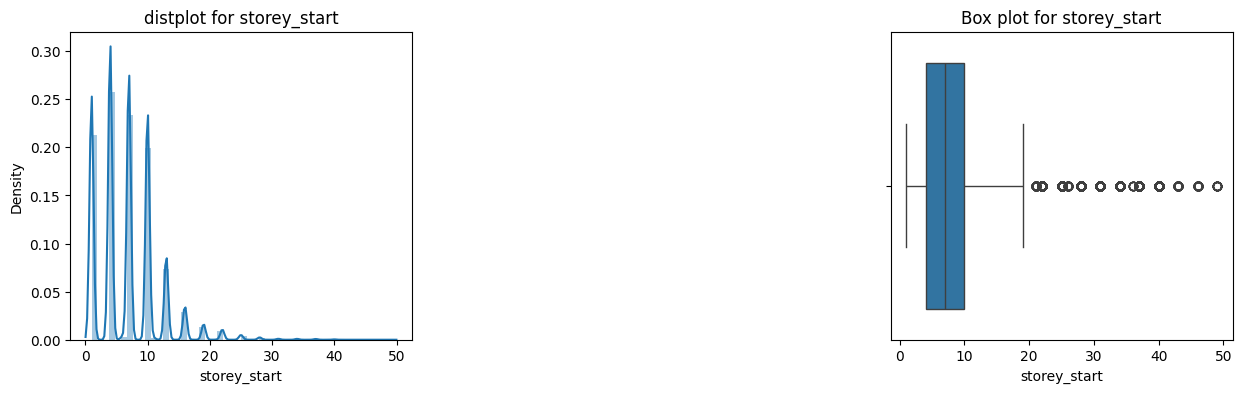

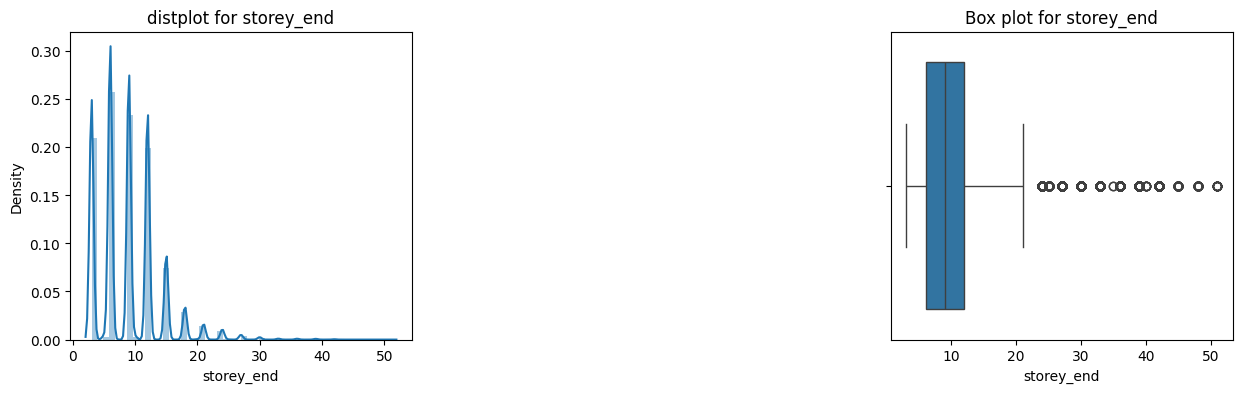

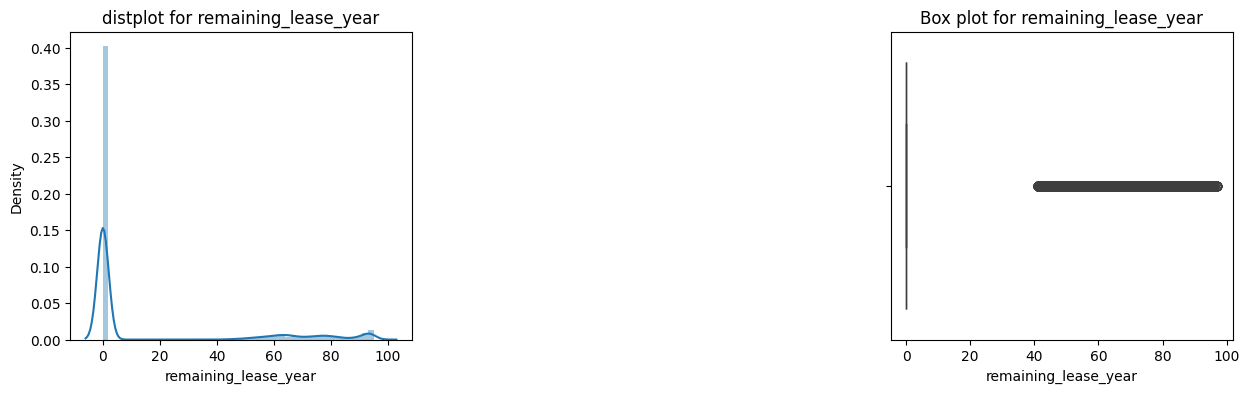

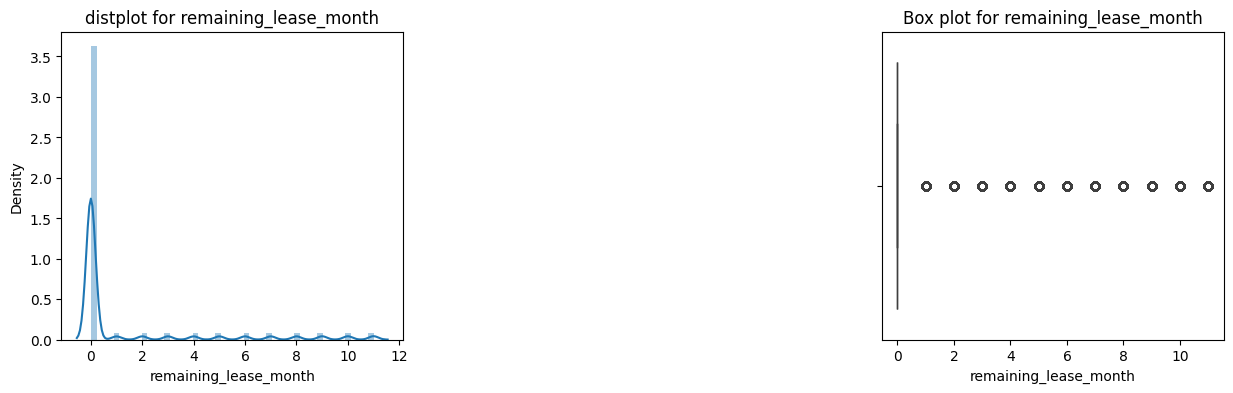

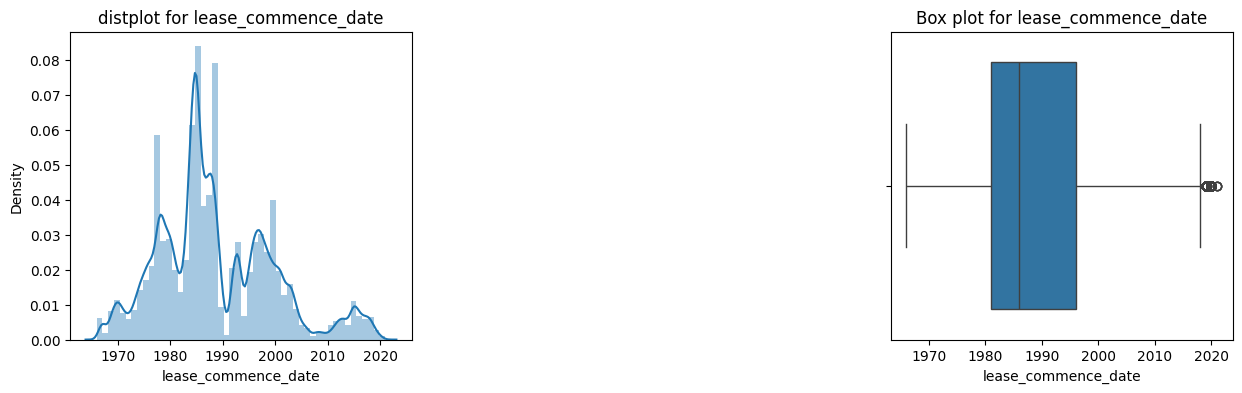

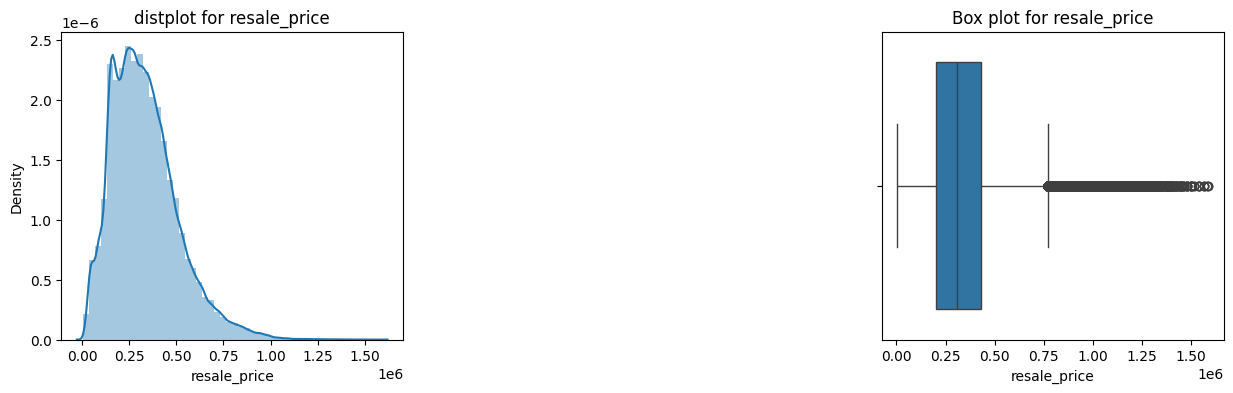

In [203]:
for i in df_final.columns:
    plot(df_final,i)

Skewness correction

In [204]:
#Handling skewness columns
df_final["storey_start"]= np.log(df_final["storey_start"])
df_final["storey_end"]= np.log(df_final["storey_end"])
df_final["resale_price"]= np.log(df_final["resale_price"])

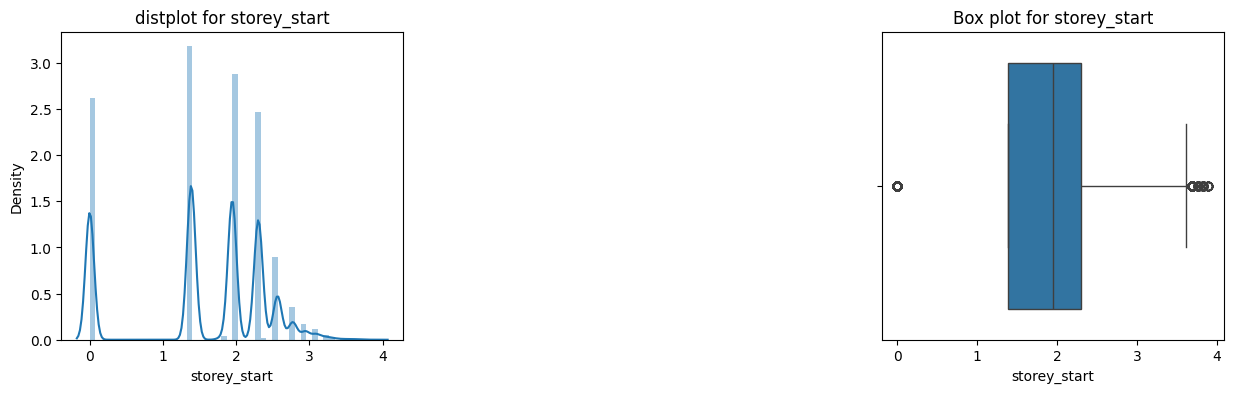

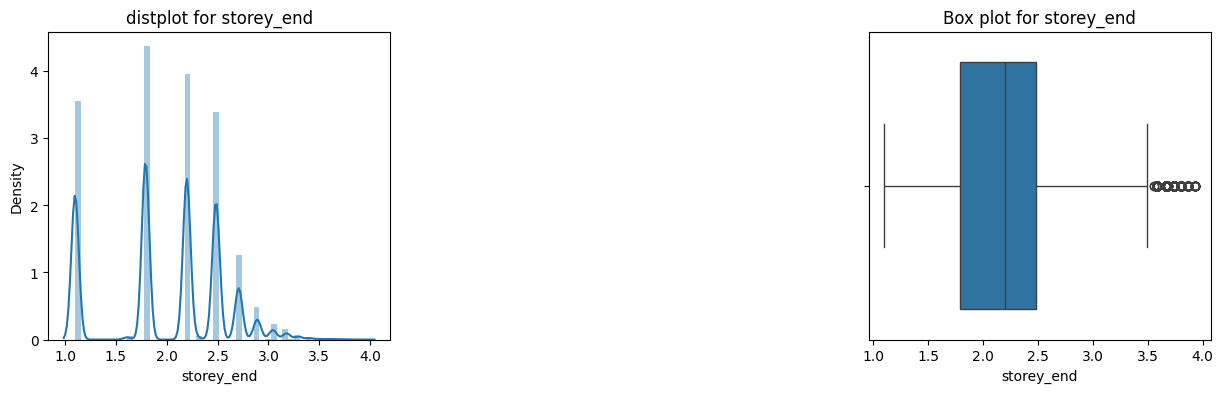

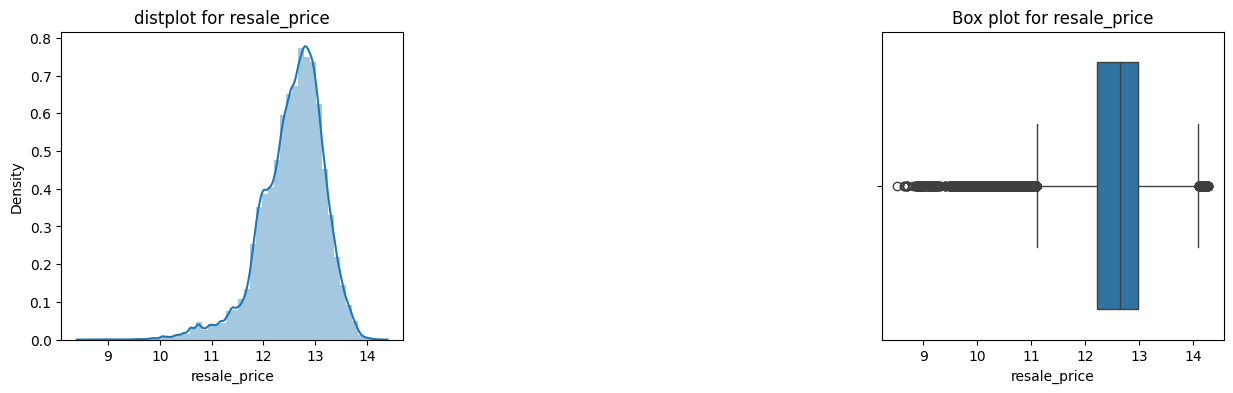

In [205]:
skewed_columns=["storey_start","storey_end","resale_price"]
for i in skewed_columns:
    plot(df_final,i)

Outlier correction

In [206]:
# The Outlier Columns are
# floor_area_sqm
# storey_start
# sortey_end
# resale_price
# lease_commence_date
# remaining_lease_year
# remaining_lease_month

# (Ex: lower threshold = 5 and upper threshold = 20)
# above upper threshold values (>20) are converted to upper threshold value (20) in features
# below lower threshold values (<5)  are converted to lower threshold value (5)  in features

In [207]:
def outlier(data,column):
  q1= data[column].quantile(0.25)
  q3= data[column].quantile(0.75)

  iqr= q3-q1

  upper_threshold= q3 + (1.5*iqr)
  lower_threshold= q1 - (1.5*iqr)

  data[column]= data[column].clip(lower_threshold, upper_threshold)

In [208]:
outlier_columns=['floor_area_sqm','storey_start', 'storey_end','resale_price','remaining_lease_year','remaining_lease_month',
                     'lease_commence_date',]
for j in outlier_columns:
    outlier(df_final,j)

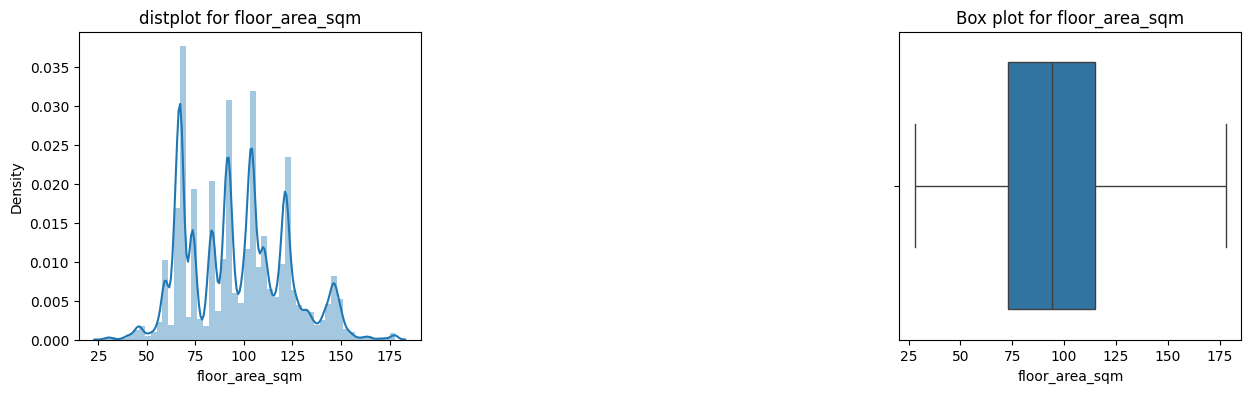

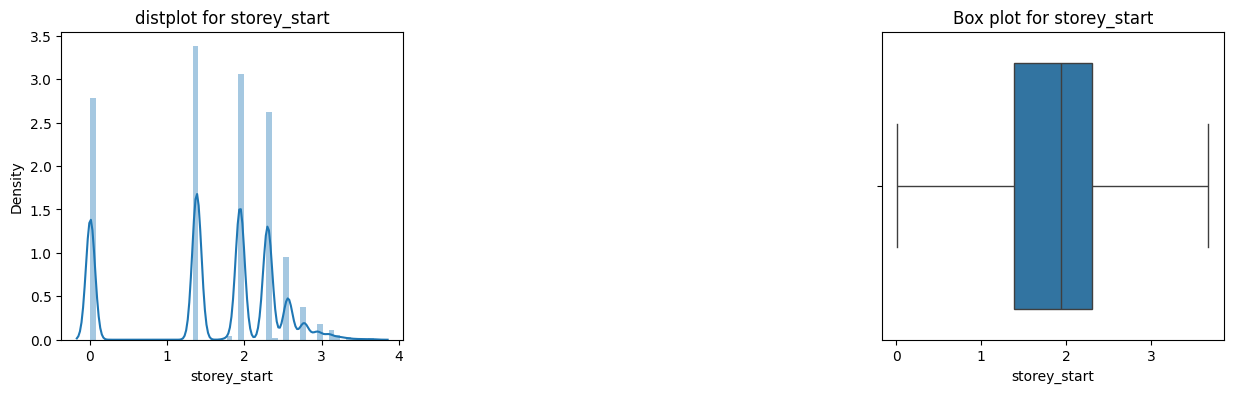

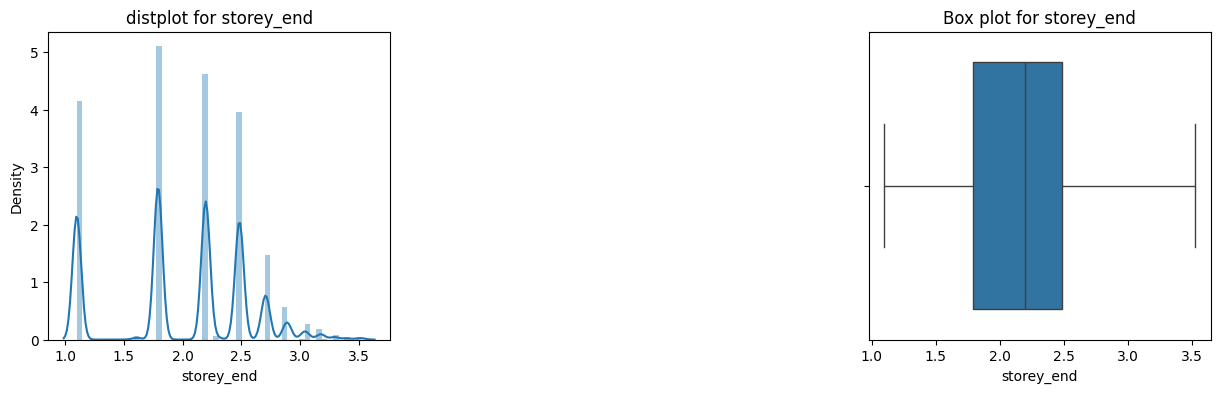

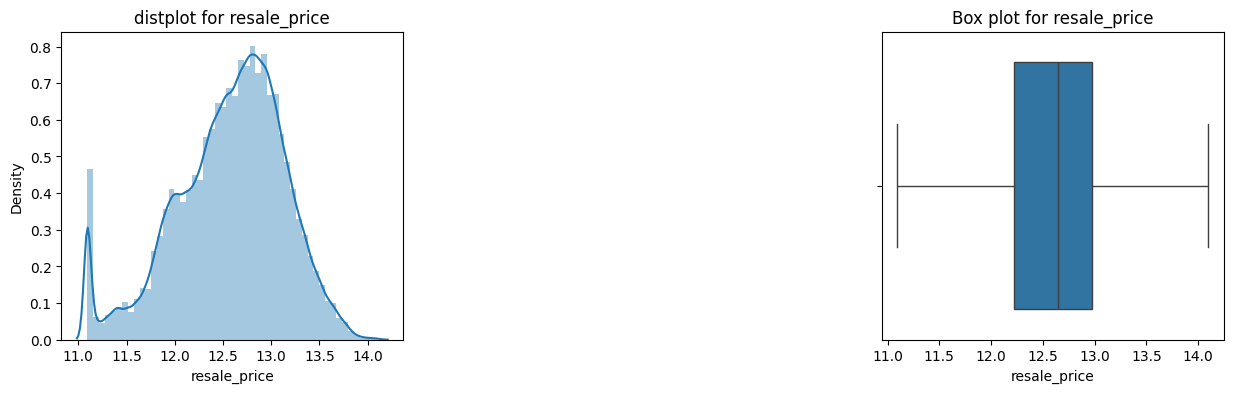

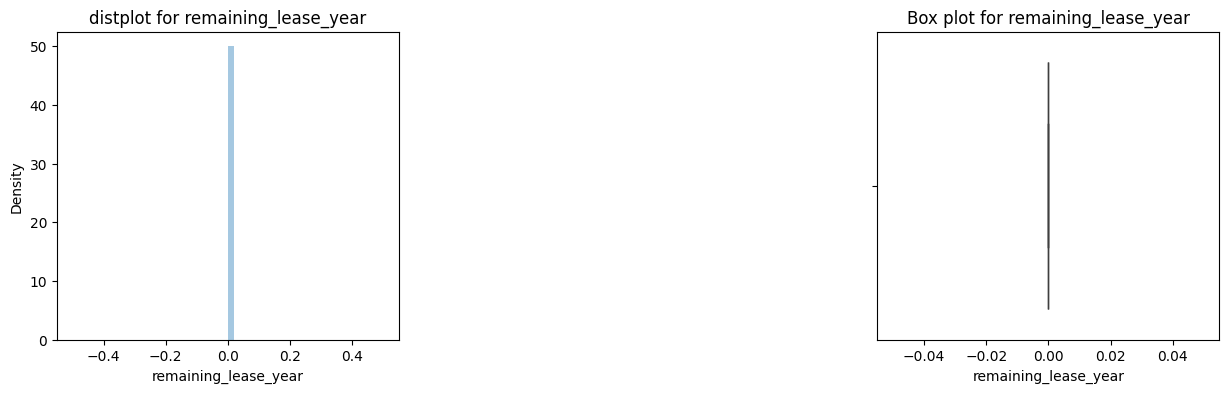

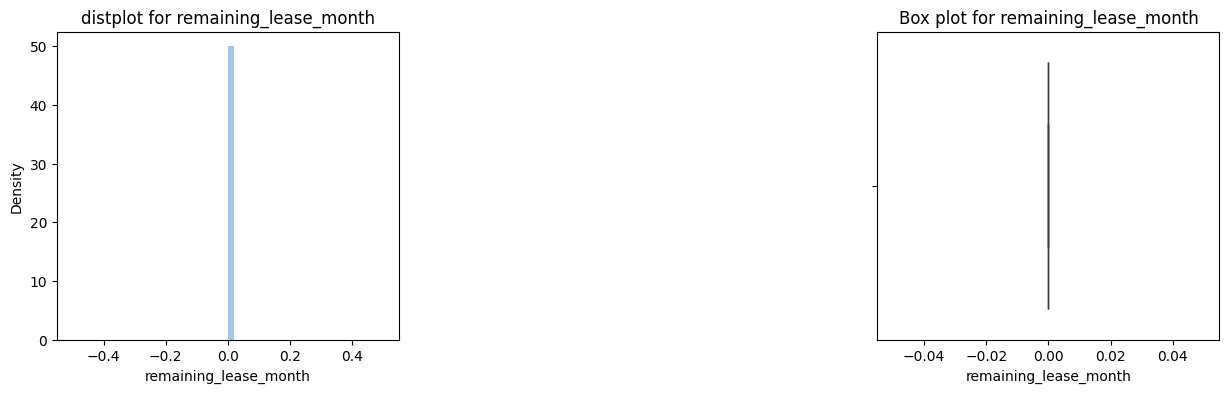

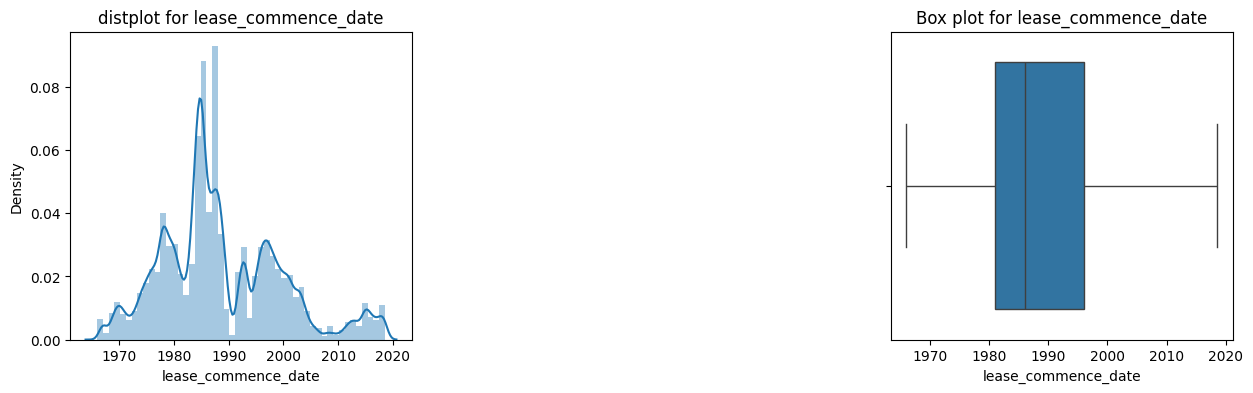

In [209]:
for k in outlier_columns:
    plot(df_final,k)

In [210]:
df_final.describe().T

,count,mean,std,min,25%,50%,75%,max
year,873679.0,2006.831067,9.531857,1990.000000,1999.000000,2006.000000,2015.000000,2024.000000
town,873679.0,13.664614,8.717439,0.000000,5.000000,13.000000,23.000000,26.000000
flat_type,873679.0,3.040225,0.953309,0.000000,2.000000,3.000000,4.000000,7.000000
floor_area_sqm,873679.0,96.371964,25.835082,28.000000,73.000000,94.000000,115.000000,178.000000
flat_model,873679.0,15.657761,6.679980,0.000000,9.000000,16.000000,21.000000,33.000000
storey_start,873679.0,1.582825,0.906154,0.011858,1.386294,1.945910,2.302585,3.677021
storey_end,873679.0,2.015436,0.573887,1.098612,1.791759,2.197225,2.484907,3.524627
remaining_lease_year,873679.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
remaining_lease_month,873679.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
lease_commence_date,873679.0,1988.615813,10.908743,1966.000000,1981.000000,1986.000000,1996.000000,2018.500000


Model Selection (Regression)

In [211]:
# importing the model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
import pickle

In [212]:
# Train Test Split for model selection
def select_model(data, algorithm):
    # x, y spliting
    x= data.drop(columns=["resale_price"])
    y= data["resale_price"]

    X_train, X_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

    model= algorithm().fit(X_train,y_train)
    y_pred_train= model.predict(X_train)
    y_pred_test= model.predict(X_test)

    #Checking the accuracy score
    train_mse= mean_squared_error(y_train, y_pred_train)
    train_rmse= np.sqrt(train_mse)
    train_mae= mean_absolute_error(y_train, y_pred_train)
    train_r2= r2_score(y_train, y_pred_train)

    test_mse= mean_squared_error(y_test, y_pred_test)
    test_rmse= np.sqrt(test_mse)
    test_mae= mean_absolute_error(y_test, y_pred_test)
    test_r2= r2_score(y_test, y_pred_test)

    metrics_train={"Data": "Train Data",
        "Name":algorithm.__name__,
        "R2_score":train_r2,
        "Mean_squared_error":train_mse,
        "Root_mean_squared_error":train_rmse,
        "Mean_absolute_error":train_mae
        }

    metrics_test={"Data": "Test Data",
           "Name":algorithm.__name__,
           "R2_score":test_r2,
           "Mean_squared_error":test_mse,
           "Root_mean_squared_error":test_rmse,
           "Mean_absolute_error":test_mae
              }

    print(metrics_train)
    print(metrics_test)
    print("")

In [214]:
select_model(df_final, LinearRegression)
select_model(df_final, DecisionTreeRegressor)
select_model(df_final, XGBRegressor)

{'Data': 'Train Data', 'Name': 'LinearRegression', 'R2_score': 0.7895683658615111, 'Mean_squared_error': 0.06799588060807717, 'Root_mean_squared_error': 0.26076019751502943, 'Mean_absolute_error': 0.2055848860714465}
{'Data': 'Test Data', 'Name': 'LinearRegression', 'R2_score': 0.7891378291382278, 'Mean_squared_error': 0.06760142962597347, 'Root_mean_squared_error': 0.2600027492661827, 'Mean_absolute_error': 0.20522528104244644}

{'Data': 'Train Data', 'Name': 'DecisionTreeRegressor', 'R2_score': 0.9887906382988966, 'Mean_squared_error': 0.0036220334601373334, 'Root_mean_squared_error': 0.060183332079051036, 'Mean_absolute_error': 0.036476598615147134}
{'Data': 'Test Data', 'Name': 'DecisionTreeRegressor', 'R2_score': 0.9686168510018461, 'Mean_squared_error': 0.01006129136283476, 'Root_mean_squared_error': 0.10030598866884649, 'Mean_absolute_error': 0.06967762578113698}

{'Data': 'Train Data', 'Name': 'XGBRegressor', 'R2_score': 0.9745453767435033, 'Mean_squared_error': 0.0082250443520

In [215]:
#XGBRegresson
#x,y spliting
x= df_final.drop(columns=["resale_price"])
y= df_final["resale_price"]

X_train, X_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

model_1= XGBRegressor().fit(X_train,y_train)
y_pred= model_1.predict(X_test)

test_mse= mean_squared_error(y_test, y_pred)
test_rmse= np.sqrt(test_mse)
test_mae= mean_absolute_error(y_test, y_pred)
test_r2= r2_score(y_test, y_pred)

metrics_test={"Data": "Test Data",
        "Name":XGBRegressor.__name__,
        "R2_score":test_r2,
        "Mean_squared_error":test_mse,
        "Root_mean_squared_error":test_rmse,
        "Mean_absolute_error":test_mae
            }

print(metrics_test)

{'Data': 'Test Data', 'Name': 'XGBRegressor', 'R2_score': 0.9740396085954695, 'Mean_squared_error': 0.00832278054154408, 'Root_mean_squared_error': 0.09122927458630854, 'Mean_absolute_error': 0.06774418716663776}


In [216]:
# Saving the Model unsing pickle
with open("ResaleFlatPrices_Model.pkl","wb") as f:
  pickle.dump(model_1,f)

In [217]:
with open("ResaleFlatPrices_Model.pkl","rb") as f1:
    regg_model= pickle.load(f1)